# Analyzing Project Metadata

In [1]:
# importing all required packages at the start of the notebook
import IPython

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id='jup'></a>

### 2.1 Reading metadata

In [3]:
df_meta = pd.read_csv('../alien-data/sample_metadata.tsv', sep='\t')
df_meta.head()

,sampleid,stool_consistency,hct_source,disease,categorical_time_relative_to_engraftment,week_relative_to_hct,timepoint_of_transplant,day_relative_to_nearest_hct,alleged_abduction
0,N4VICF,formed,cord,Myelodysplastic Syndromes,pre,-1.0,6.0,-6.0,0
1,8A0F9A,formed,cord,Leukemia,pre,-2.0,7.0,-7.0,0
2,5Y49IM,semi-formed,cord,Leukemia,peri,-1.0,7.0,0.0,1
3,ZKJI45,semi-formed,cord,Leukemia,post,1.0,7.0,8.0,0
4,2I7SIQ,liquid,cord,Leukemia,peri,-1.0,0.0,0.0,1


In [6]:
for column_name in df_meta:
    print(column_name)

sampleid
stool_consistency
hct_source
disease
categorical_time_relative_to_engraftment
week_relative_to_hct
timepoint_of_transplant
day_relative_to_nearest_hct
alleged_abduction


To get the data from range of rows with specific column names

In [11]:
df_meta.loc[10:12, ["disease", "alleged_abduction"]]

,disease,alleged_abduction
10,Non-Hodgkin's Lymphoma,0
11,Non-Hodgkin's Lymphoma,0
12,Non-Hodgkin's Lymphoma,0


### **2.2 Investigating pandas dataframe**

In [12]:
df_meta.shape

(161, 9)

Check unique number of elements in each column

In [17]:
for column_name in df_meta:
    print(f'{column_name}: {len(df_meta[column_name].unique())} unique elements')

sampleid: 161 unique elements
stool_consistency: 3 unique elements
hct_source: 3 unique elements
disease: 5 unique elements
categorical_time_relative_to_engraftment: 4 unique elements
week_relative_to_hct: 6 unique elements
timepoint_of_transplant: 15 unique elements
day_relative_to_nearest_hct: 25 unique elements
alleged_abduction: 2 unique elements


**e)** How many different bodysites (`bodysite`) were evaluated in how many samples? ([Hint](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html))

In [25]:
for column_name in df_meta:
    if column_name != 'sampleid':
        print(column_name)
        print(df_meta[column_name].value_counts())

stool_consistency
formed         74
liquid         45
semi-formed    42
Name: stool_consistency, dtype: int64
hct_source
PBSC_unmodified    88
cord               69
Name: hct_source, dtype: int64
disease
Leukemia                     79
Non-Hodgkin's Lymphoma       60
Hodgkin's Disease            12
Myelodysplastic Syndromes     6
Name: disease, dtype: int64
categorical_time_relative_to_engraftment
pre     70
post    60
peri    27
Name: categorical_time_relative_to_engraftment, dtype: int64
week_relative_to_hct
-1.0    71
 1.0    40
 0.0    28
 2.0     9
-2.0     9
Name: week_relative_to_hct, dtype: int64
timepoint_of_transplant
6.0      51
5.0      36
3.0      13
7.0      12
9.0       9
2.0       7
1.0       7
0.0       5
4.0       5
52.0      3
363.0     3
379.0     2
14.0      2
24.0      2
Name: timepoint_of_transplant, dtype: int64
day_relative_to_nearest_hct
-2.0     15
-5.0     14
-6.0     12
-3.0     11
 12.0    11
 0.0     10
 13.0    10
 11.0     8
 5.0      6
 7.0      6
 15.

**f)** Plot the `bodysite` frequency information in a pandas barplot (adding a ylabel axis description and a title to the plot)

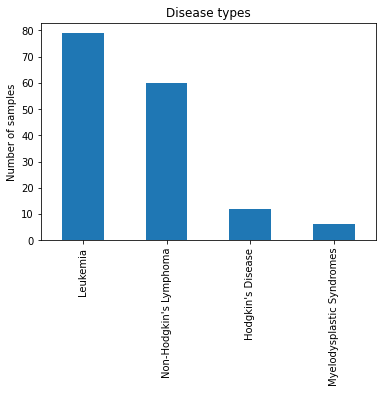

In [26]:
df_meta['disease'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Disease types')
plt.show()

**b)** Which `body_habitat` belongs to which `env`? (Hint: check out [this StackOverflow Entry](https://stackoverflow.com/questions/33271098/python-get-a-frequency-count-based-on-two-columns-variables-in-pandas-datafra))

In [28]:
df_meta.groupby(['disease', 'alleged_abduction']).size()

disease                    alleged_abduction
Hodgkin's Disease          0                    11
                           1                     1
Leukemia                   0                    60
                           1                    19
Myelodysplastic Syndromes  0                     5
                           1                     1
Non-Hodgkin's Lymphoma     0                    55
                           1                     5
dtype: int64

Generate descriptive statistics for all numeric columns in your dataset. 

In [29]:
df_meta.describe()

,week_relative_to_hct,timepoint_of_transplant,day_relative_to_nearest_hct,alleged_abduction
count,157.000000,157.000000,157.000000,161.000000
mean,-0.197452,17.898089,2.757962,0.161491
std,1.064819,64.362573,7.469941,0.369131
min,-2.000000,0.000000,-9.000000,0.000000
25%,-1.000000,5.000000,-3.000000,0.000000
50%,-1.000000,6.000000,0.000000,0.000000
75%,1.000000,6.000000,11.000000,0.000000
max,2.000000,379.000000,16.000000,1.000000


Absolute counts of missing values:

In [30]:
df_meta.isnull().sum()

sampleid                                    0
stool_consistency                           0
hct_source                                  4
disease                                     4
categorical_time_relative_to_engraftment    4
week_relative_to_hct                        4
timepoint_of_transplant                     4
day_relative_to_nearest_hct                 4
alleged_abduction                           0
dtype: int64

Relative counts of missing values (as percentage):

In [31]:
df_meta.isnull().sum() * 100 / len(df_meta)

sampleid                                    0.000000
stool_consistency                           0.000000
hct_source                                  2.484472
disease                                     2.484472
categorical_time_relative_to_engraftment    2.484472
week_relative_to_hct                        2.484472
timepoint_of_transplant                     2.484472
day_relative_to_nearest_hct                 2.484472
alleged_abduction                           0.000000
dtype: float64